# Task 2

## Import Libraries

In [ ]:
import sys
import os
from datetime import datetime
sys.path.append('../src')

import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
import torch.nn as nn

from task2.environment import CustomTrafficEnvironment
from task2.td_agents import TemporalDifference
from task2.rule_agents import RuleBasedAgent
from task2.policy_agents import PolicyAgents
from task1d.visualization import extract_timesteps_from_json, create_visualization_from_cached_data

seed = 2024
training_seed = 42

c:\Users\danie\OneDrive - Singapore Management University\SMU Singapore\Academics\Aug 2024\CS609_ReinforcementLearning\Project\LaneSwitchRL-Simulation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Rule-Based Agent

### Fastest Adjacent Lane

100%|██████████| 500/500 [00:59<00:00,  8.37it/s]


Truncated episodes: 19
Average cumulative rewards for Fastest Adjacent Lane strategy: 280
Average timesteps to termination for Fastest Adjacent Lane strategy: 407
Reward types: {'time_reward': -788.64, 'lane_change_reward': 248.7678000000001, 'clearance_rate_reward': 979.6998, 'risk_accident_reward': -159.394}


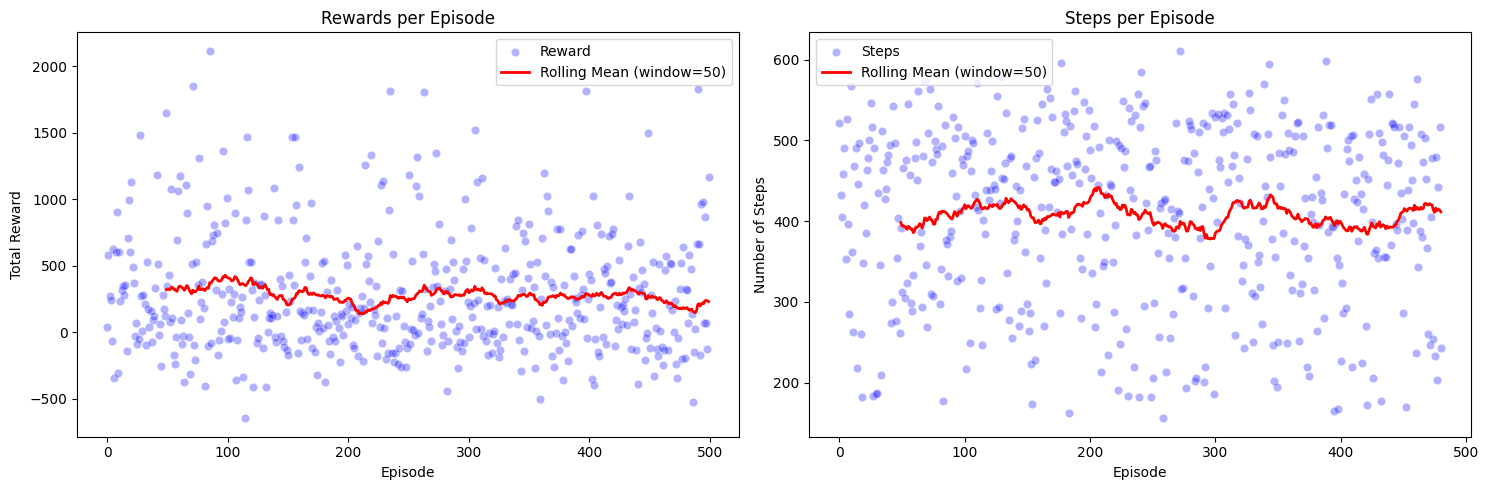

In [5]:
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=seed)

agent = RuleBasedAgent(env=env, strategy='fastest_adjacent')
all_episode_rewards, all_timesteps, all_episode_reward_types, fast_log_file = agent.evaluate_agent(num_episodes=500, output_file=f'./logs/task2/fast_lane/fast_lane_test_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json')

print(f'Average cumulative rewards for Fastest Adjacent Lane strategy: {round(np.mean(all_episode_rewards))}')
print(f'Average timesteps to termination for Fastest Adjacent Lane strategy: {round(np.mean(all_timesteps))}')
print(f'Reward types: {all_episode_reward_types}')
agent.plot_metrics(all_episode_rewards, all_timesteps, window_size=50)
plt.show()

In [6]:
json_path = fast_log_file

extract_timesteps_from_json(json_path)
gif_filename = os.path.basename(json_path).replace('.json', '.gif')

gif_filepath = f'./gifs/task2/{gif_filename}'

create_visualization_from_cached_data(gif_filename=gif_filepath, step_interval=1)

Timesteps data from the first line successfully cached, containing 522 timesteps
GIF saved at ./gifs/task2/fast_lane_test_log_20241113_153206.gif


### Same Lane

100%|██████████| 500/500 [00:39<00:00, 12.62it/s]


Truncated episodes: 5
Average cumulative rewards for Same Lane Agent 1: -1027
Average timesteps to termination for Same Lane Agent 1: 504
Reward types: {'time_reward': -999.84, 'lane_change_reward': 0.0, 'clearance_rate_reward': 42.12419999999998, 'risk_accident_reward': -69.614}




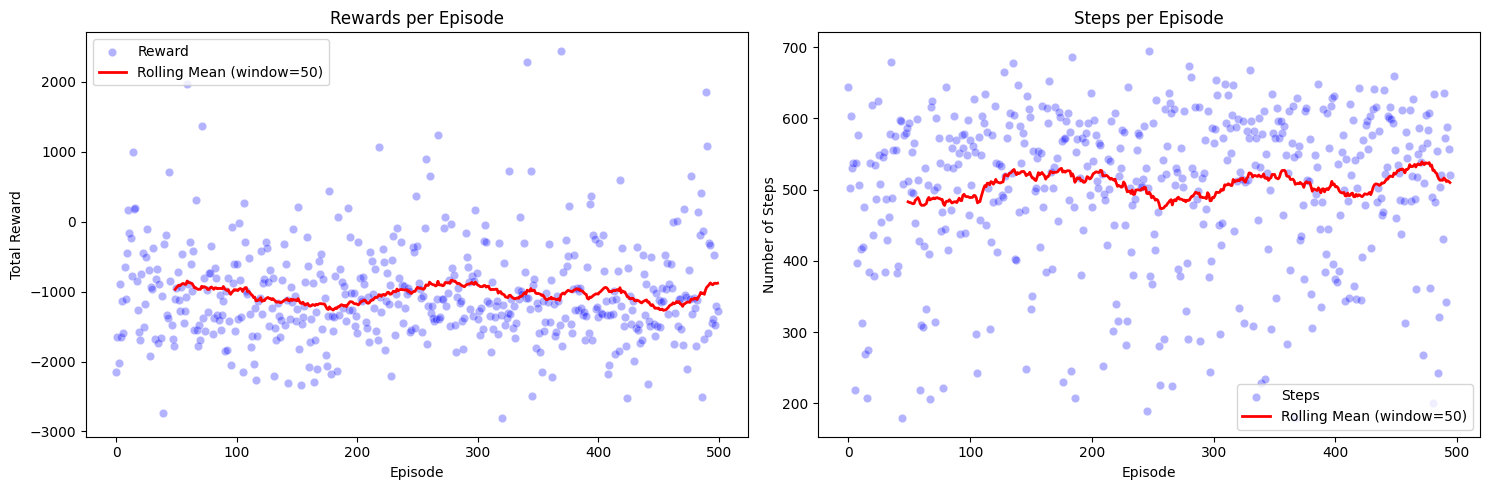

100%|██████████| 500/500 [00:40<00:00, 12.25it/s]


Truncated episodes: 1
Average cumulative rewards for Same Lane Agent 2: -1984
Average timesteps to termination for Same Lane Agent 2: 511
Reward types: {'time_reward': -1020.488, 'lane_change_reward': 0.0, 'clearance_rate_reward': -920.8089999999995, 'risk_accident_reward': -42.546}




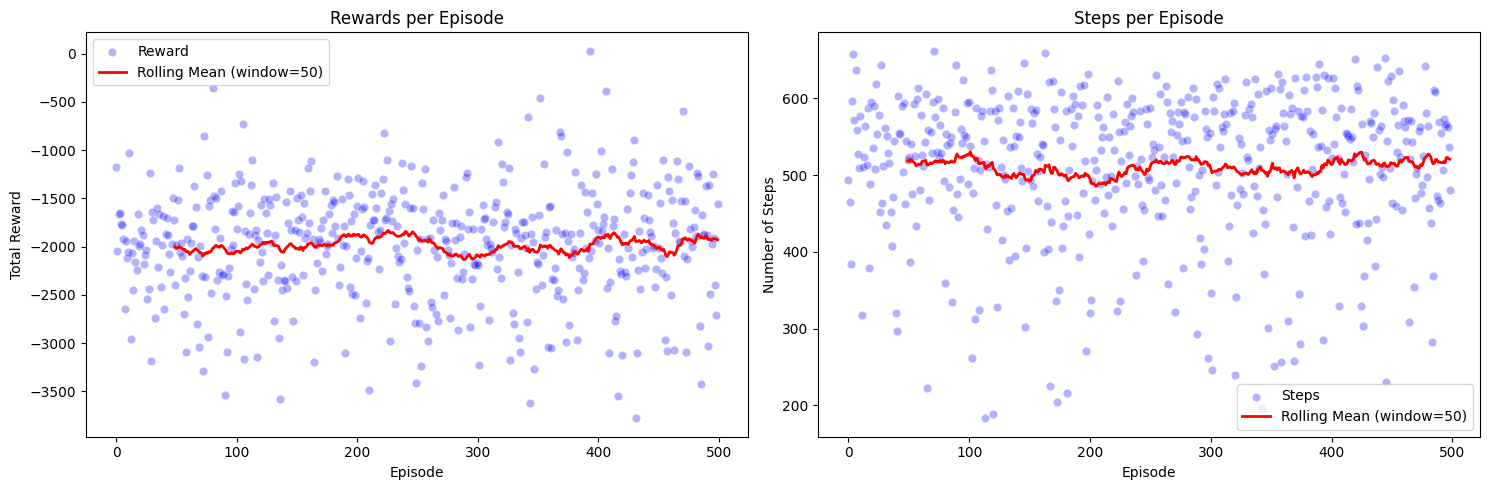

100%|██████████| 500/500 [00:39<00:00, 12.73it/s]


Truncated episodes: 2
Average cumulative rewards for Same Lane Agent 3: -1747
Average timesteps to termination for Same Lane Agent 3: 490
Reward types: {'time_reward': -977.26, 'lane_change_reward': 0.0, 'clearance_rate_reward': -716.7499999999998, 'risk_accident_reward': -52.884}




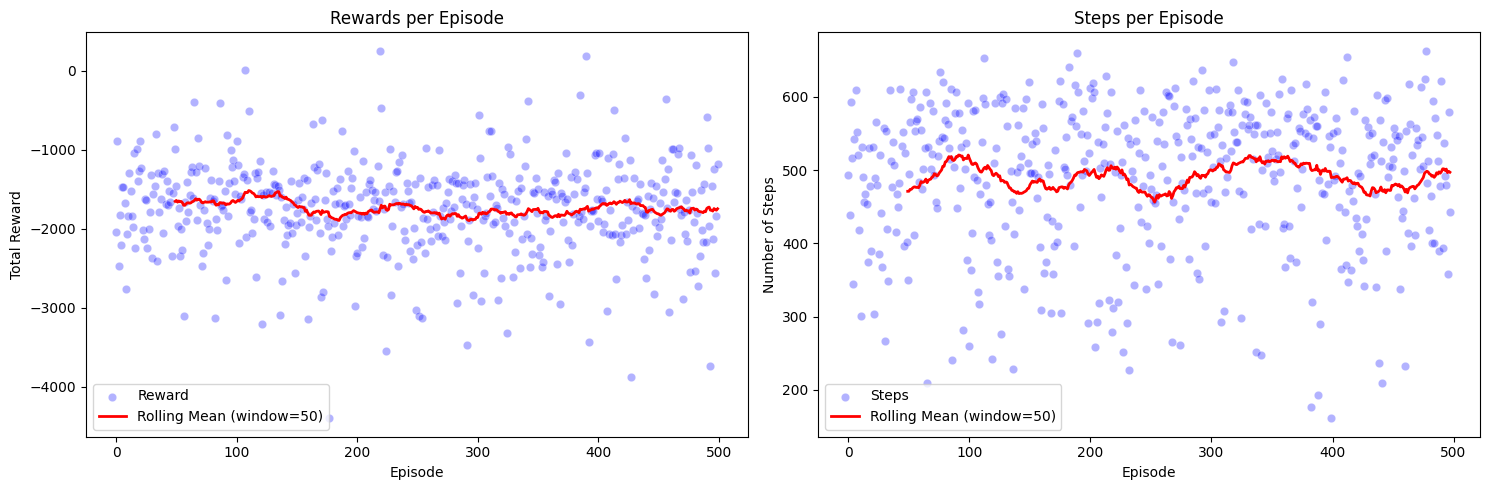

100%|██████████| 500/500 [00:40<00:00, 12.49it/s]


Truncated episodes: 3
Average cumulative rewards for Same Lane Agent 4: -1938
Average timesteps to termination for Same Lane Agent 4: 510
Reward types: {'time_reward': -1013.684, 'lane_change_reward': 0.0, 'clearance_rate_reward': -879.1995999999996, 'risk_accident_reward': -44.702}




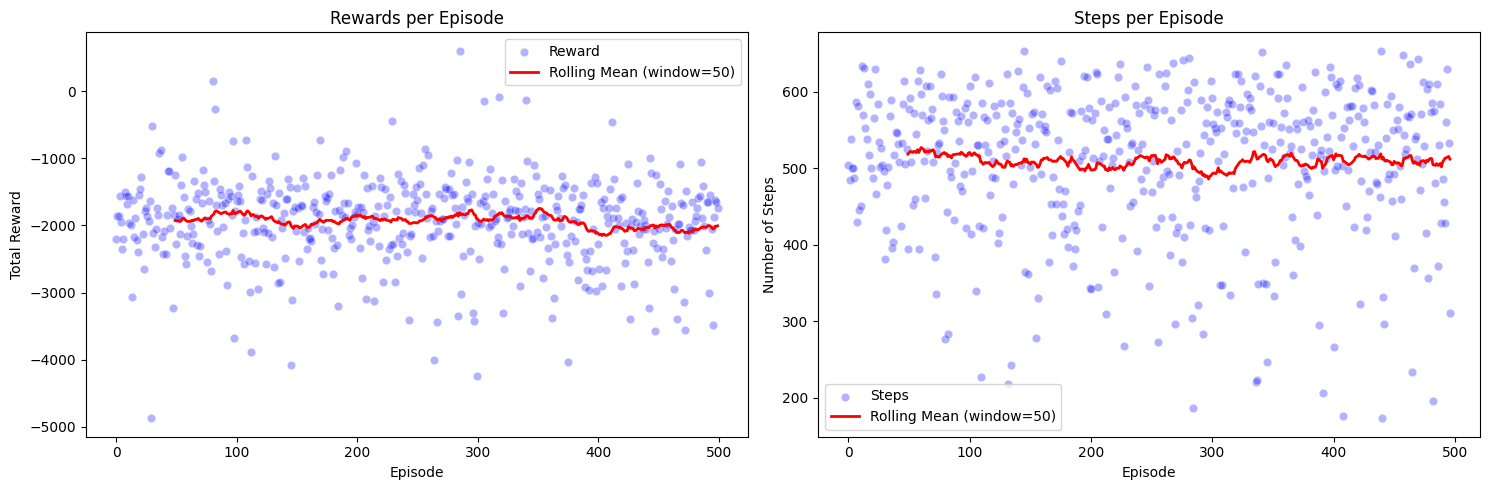

100%|██████████| 500/500 [00:40<00:00, 12.38it/s]


Truncated episodes: 3
Average cumulative rewards for Same Lane Agent 5: -1153
Average timesteps to termination for Same Lane Agent 5: 510
Reward types: {'time_reward': -1013.988, 'lane_change_reward': 0.0, 'clearance_rate_reward': -80.57700000000001, 'risk_accident_reward': -58.51}




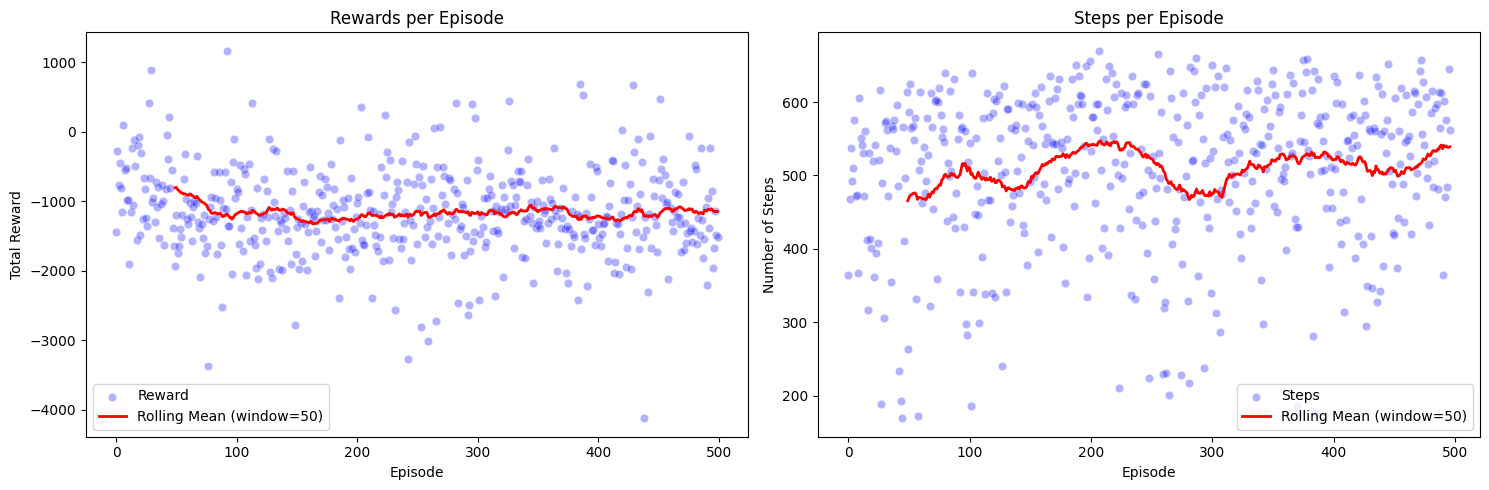

In [5]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=seed)
rewards_dict = {}
timesteps_dict = {}
log_files = []
for i in range(5):
    agent = RuleBasedAgent(env=env, strategy='stay')
    all_episode_rewards, all_timesteps, all_episode_reward_types, log_file = agent.evaluate_agent(num_episodes=500, starting_lane=i+1, output_file=f'./logs/task2/same_lane/rule_lane{i+1}_test_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json')
    log_files.append(log_file)
    rewards_dict[f'Same Lane Agent {i+1}'] = all_episode_rewards
    timesteps_dict[f'Same Lane Agent {i+1}'] = all_timesteps
    
    print(f'Average cumulative rewards for Same Lane Agent {i+1}: {round(np.mean(all_episode_rewards))}')
    print(f'Average timesteps to termination for Same Lane Agent {i+1}: {round(np.mean(all_timesteps))}')
    print(f'Reward types: {all_episode_reward_types}')
    print('\n')
    agent.plot_metrics(all_episode_rewards, all_timesteps, window_size=50)
    plt.show()

In [ ]:
for i in range(1):
    json_path = log_files[i]

    extract_timesteps_from_json(json_path)
    gif_filename = os.path.basename(json_path).replace('.json', '.gif')

    gif_filepath = f'./gifs/task2/{gif_filename}'

    create_visualization_from_cached_data(gif_filename=gif_filepath, step_interval=1)

Timesteps data from the first line successfully cached, containing 288 timesteps
GIF saved at ./gifs/task2/rule_lane1_test_log_20241107_164346.gif


## Value-based Agent

### Q-Learning

#### Training

100%|██████████| 1705/1705 [03:06<00:00,  9.15it/s]


Early Termination Count: 49
Average total reward per episode = -335.20099706744867
Average steps per episode = 420.10084541062804


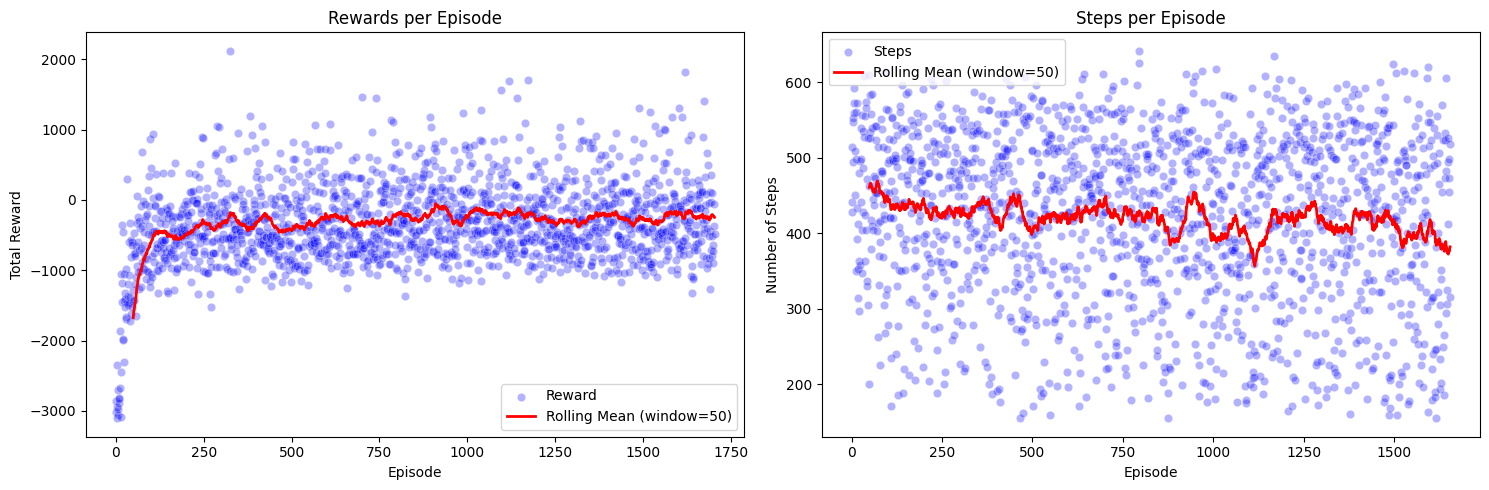

In [ ]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)

q_learning = TemporalDifference(env, oiv = 0.1, alpha=5e-3, epsilon=1.0, lambd=0, gamma=0.55, epsilon_decay=0.9999, epsilon_min=0.06)
total_reward_list, total_steps_list = q_learning.train(num_episodes = 1705, on_policy = False)

print(f'Average total reward per episode = {np.mean(total_reward_list)}')
print(f'Average steps per episode = {np.mean(total_steps_list)}')

# plot training metrics
q_learning.plot_metrics(total_reward_list, total_steps_list, window_size=50)
plt.show()

Save the agent's Q-Table

In [3]:
q_learning.save_q_table("./logs/task2/task2_QLearning_q_table.json")

Q-table saved to ./logs/task2/task2_QLearning_q_table.json


Analyze the action distribution of the agent

Action Distribution:
Left:  1482 (32.7%)
Stay:  1774 (39.2%)
Right: 1273 (28.1%)


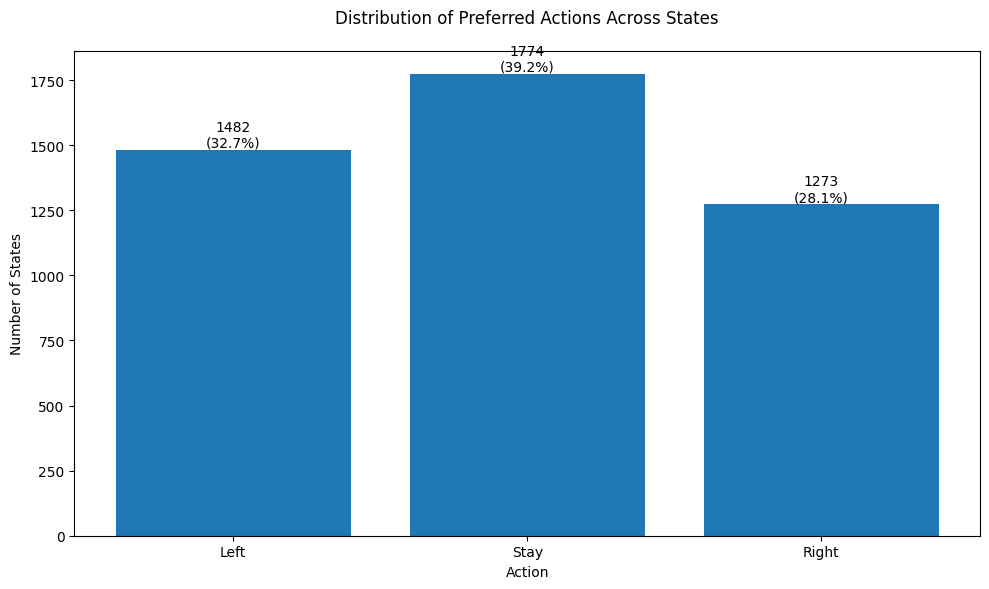

(1482, 1774, 1273, 32.722455288143074, 39.169794656657096, 28.107750055199826)

In [4]:
q_learning.analyze_model_actions()

#### Evaluation

In [5]:
q_learning.load_q_table("./logs/task2/task2_QLearning_q_table.json")

Q-table loaded from ./logs/task2/task2_QLearning_q_table.json


100%|██████████| 500/500 [01:18<00:00,  6.34it/s]


Early terminations: 12
Average cumulative rewards for TD-Lambda Agent: -45
Average timesteps to termination for TD-Lambda Agent: 406
Reward types: {'time_reward': -796.42, 'lane_change_reward': 116.57879999999999, 'clearance_rate_reward': 827.272, 'risk_accident_reward': -191.944}


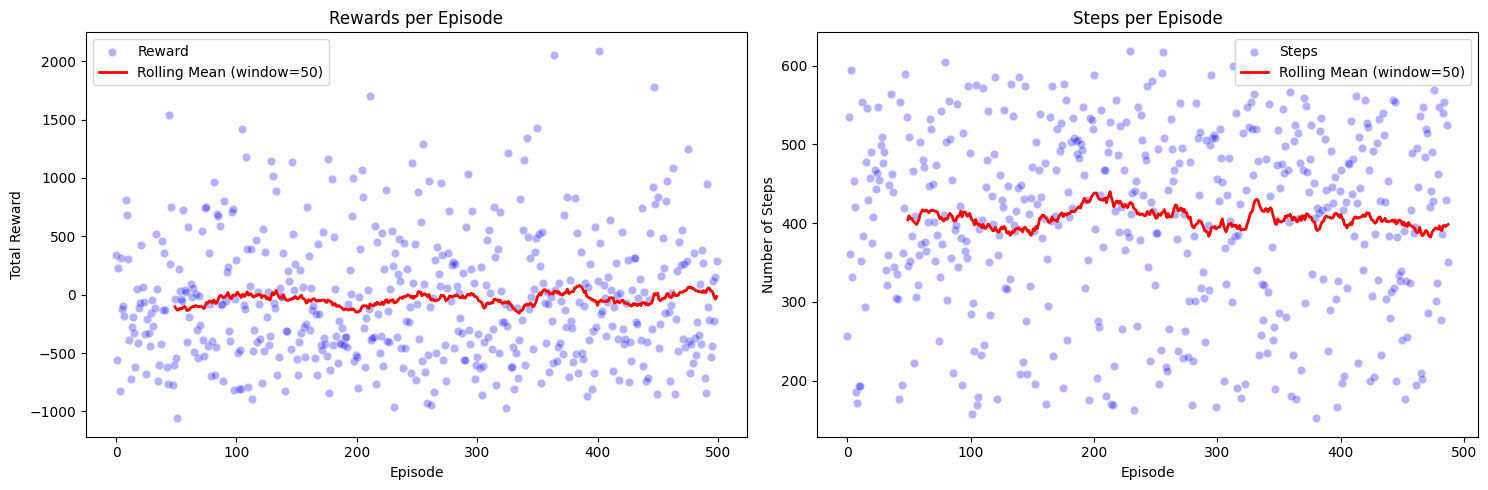

In [6]:
# Training and evaluation using different seeds
q_learning.Env.set_seed(seed)
q_learning.set_seed(seed)

# Evaluate the agent in inference mode
all_rewards, all_steps, all_reward_types, log_file = q_learning.evaluate(num_episodes=500)

# Print the results
print(f"Average cumulative rewards for TD-Lambda Agent: {round(np.mean(all_rewards))}")
print(f"Average timesteps to termination for TD-Lambda Agent: {round(np.mean(all_steps))}")
print(f"Reward types: {all_reward_types}")

q_learning.plot_metrics(all_rewards, all_steps, window_size=50)
plt.show()

### SARSA

#### Training

100%|██████████| 2000/2000 [03:43<00:00,  8.95it/s]


Early Termination Count: 66
Average total reward per episode = -334.1993
Average steps per episode = 421.70992761116855


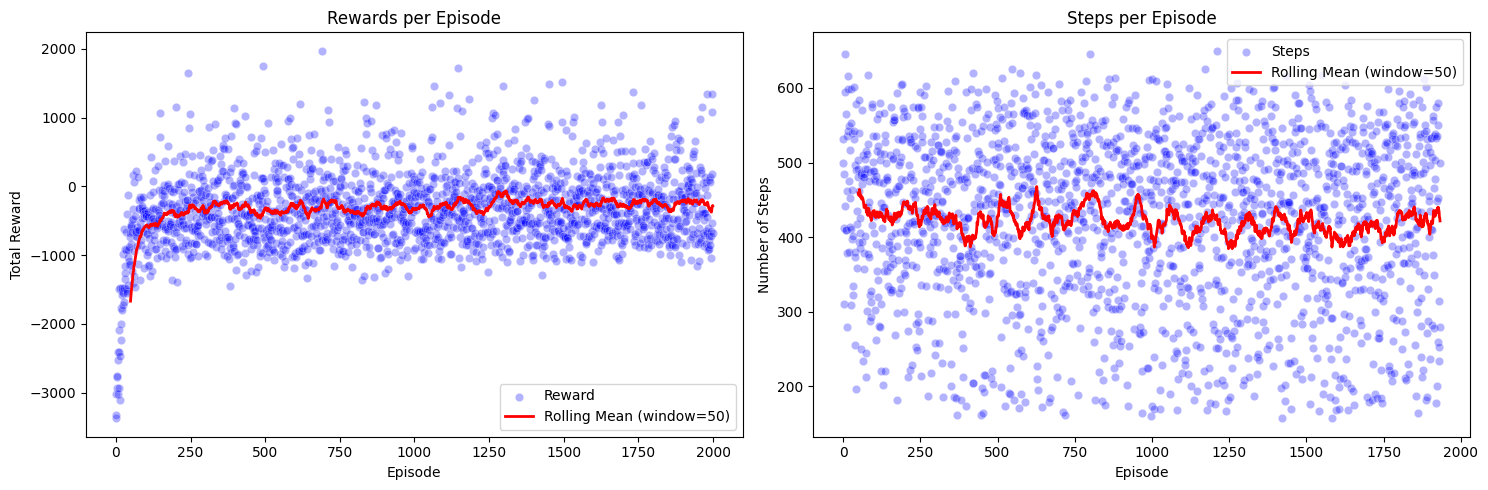

In [7]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)

sarsa = TemporalDifference(env, oiv = 0.1, alpha=5e-3, epsilon=1.0, lambd=0, gamma=0.55, epsilon_decay=0.9999, epsilon_min=0.06)
total_reward_list, total_steps_list = sarsa.train(num_episodes = 2000, on_policy = True)

print(f'Average total reward per episode = {np.mean(total_reward_list)}')
print(f'Average steps per episode = {np.mean(total_steps_list)}')

# plot training metrics
sarsa.plot_metrics(total_reward_list, total_steps_list, window_size=50)
plt.show()

In [8]:
q_learning.save_q_table("./logs/task2/task2_SARSA_q_table.json")

Q-table saved to ./logs/task2/task2_SARSA_q_table.json


Action Distribution:
Left:  1508 (33.1%)
Stay:  1810 (39.8%)
Right: 1233 (27.1%)


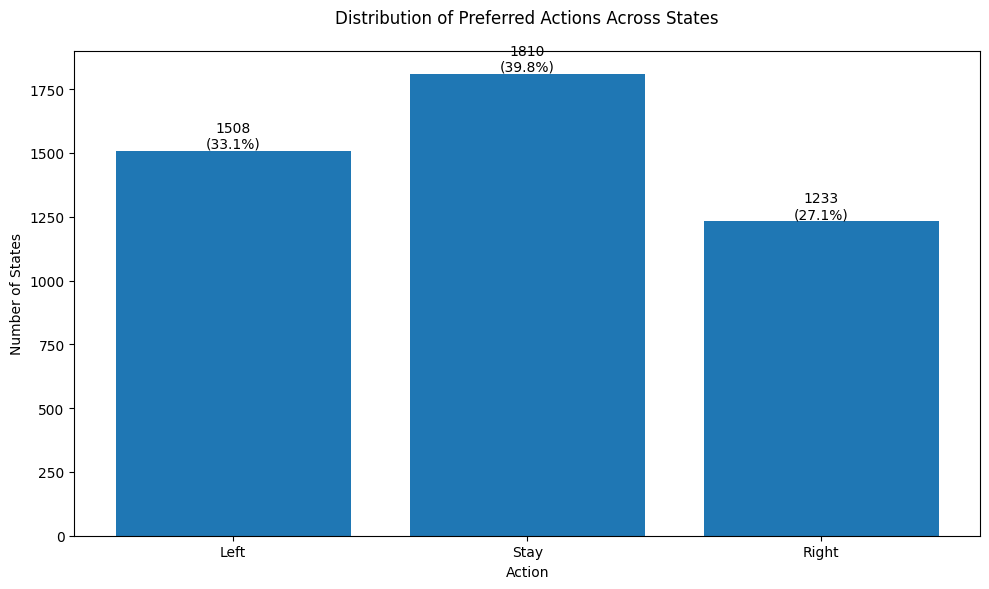

(1508, 1810, 1233, 33.13557459898923, 39.771478795869044, 27.092946605141726)

In [12]:
sarsa.analyze_model_actions()

#### Evaluation

In [9]:
q_learning.load_q_table("./logs/task2/task2_SARSA_q_table.json")

Q-table loaded from ./logs/task2/task2_SARSA_q_table.json


100%|██████████| 500/500 [00:58<00:00,  8.62it/s]


Early terminations: 20
Average cumulative rewards for TD-Lambda Agent: -9
Average timesteps to termination for TD-Lambda Agent: 407
Reward types: {'time_reward': -785.684, 'lane_change_reward': 107.2374, 'clearance_rate_reward': 859.6202000000001, 'risk_accident_reward': -190.168}


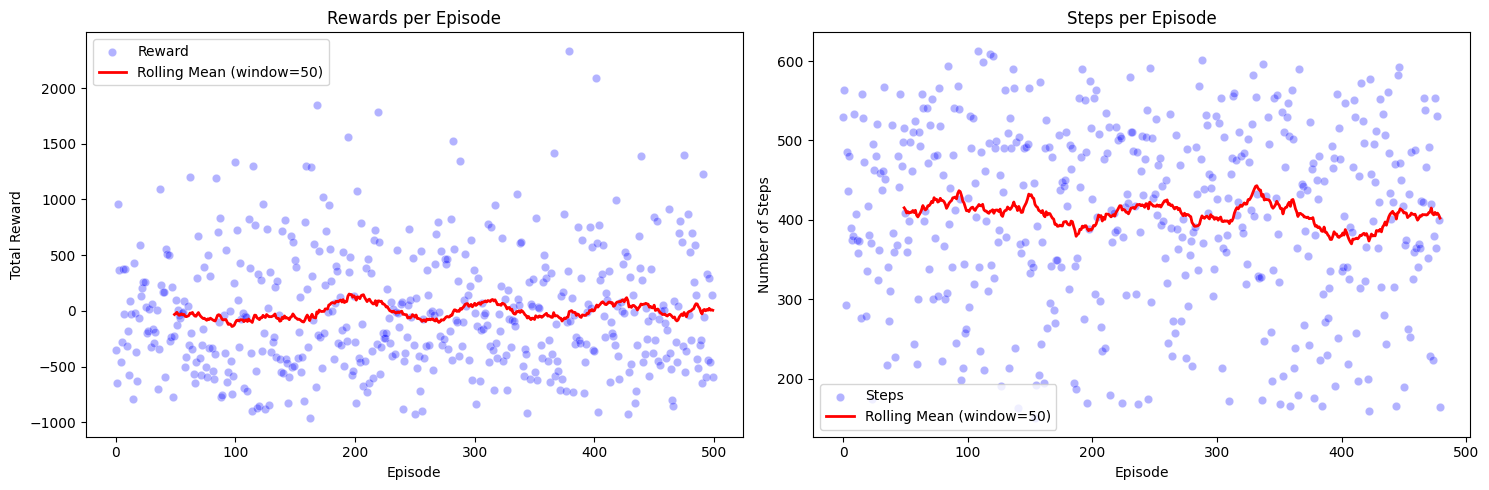

In [10]:
# Training and evaluation using different seeds
sarsa.Env.set_seed(seed)
sarsa.set_seed(seed)

# Evaluate the agent in inference mode
all_rewards, all_steps, all_reward_types, log_file = sarsa.evaluate(num_episodes=500)

# Print the results
print(f"Average cumulative rewards for TD-Lambda Agent: {round(np.mean(all_rewards))}")
print(f"Average timesteps to termination for TD-Lambda Agent: {round(np.mean(all_steps))}")
print(f"Reward types: {all_reward_types}")

sarsa.plot_metrics(all_rewards, all_steps, window_size=50)
plt.show()

### TD-Lambda

#### Training

100%|██████████| 2000/2000 [1:49:09<00:00,  3.27s/it]  


Early Termination Count: 92
Average total reward per episode = -327.81125
Average steps per episode = 419.2180293501048


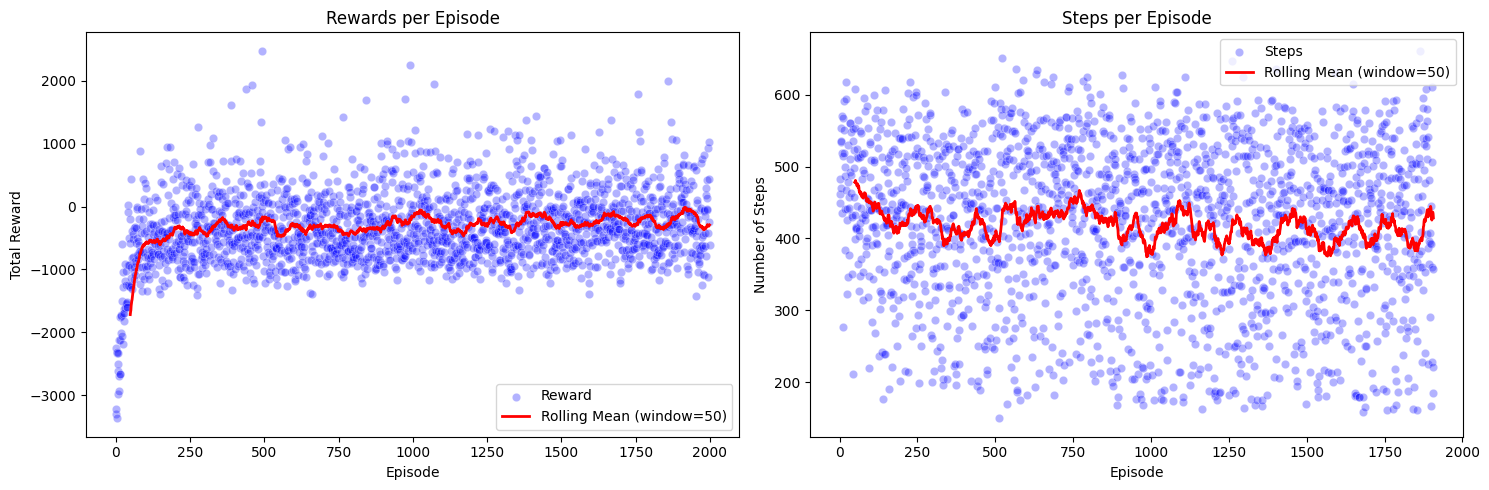

In [11]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)

td_lambda = TemporalDifference(env, oiv = 0.1, alpha=5e-3, epsilon=1.0, lambd=0.9, gamma=0.55, epsilon_decay=0.9999, epsilon_min=0.06)
total_reward_list, total_steps_list = td_lambda.train(num_episodes = 2000, on_policy = False)

print(f'Average total reward per episode = {np.mean(total_reward_list)}')
print(f'Average steps per episode = {np.mean(total_steps_list)}')

# plot training metrics
td_lambda.plot_metrics(total_reward_list, total_steps_list, window_size=50)
plt.show()

In [12]:
q_learning.save_q_table("./logs/task2/task2_TDLambda_q_table.json")

Q-table saved to ./logs/task2/task2_TDLambda_q_table.json


Action Distribution:
Left:  1579 (34.2%)
Stay:  1758 (38.0%)
Right: 1285 (27.8%)


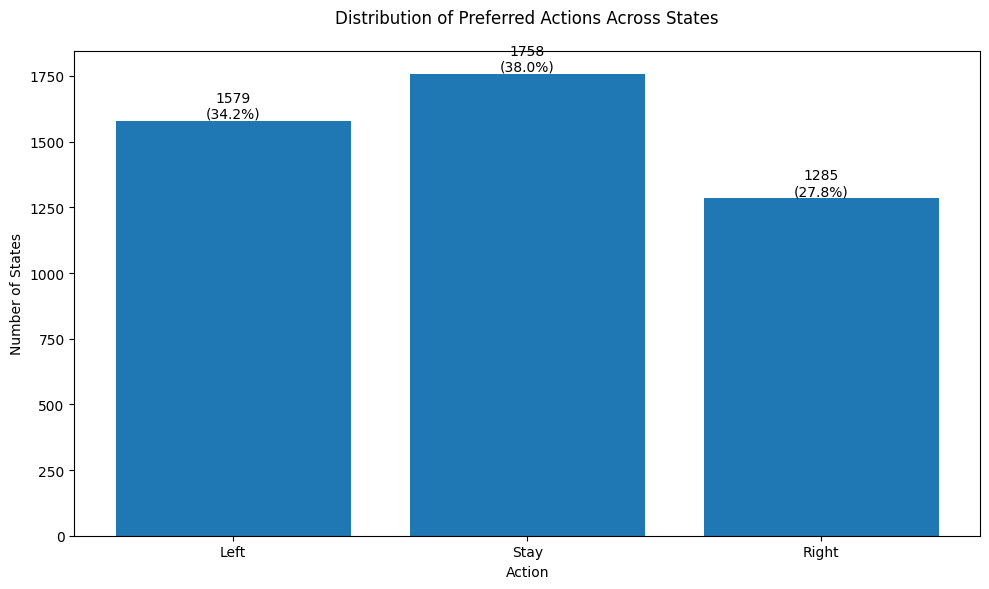

(1579, 1758, 1285, 34.162700129813935, 38.035482475119, 27.80181739506707)

In [17]:
td_lambda.analyze_model_actions()

#### Evaluation

In [13]:
q_learning.load_q_table("./logs/task2/task2_TDLambda_q_table.json")

Q-table loaded from ./logs/task2/task2_TDLambda_q_table.json


100%|██████████| 500/500 [00:36<00:00, 13.61it/s]


Early terminations: 24
Average cumulative rewards for TD-Lambda Agent: -69
Average timesteps to termination for TD-Lambda Agent: 414
Reward types: {'time_reward': -795.96, 'lane_change_reward': 91.17920000000001, 'clearance_rate_reward': 816.6124, 'risk_accident_reward': -181.26}


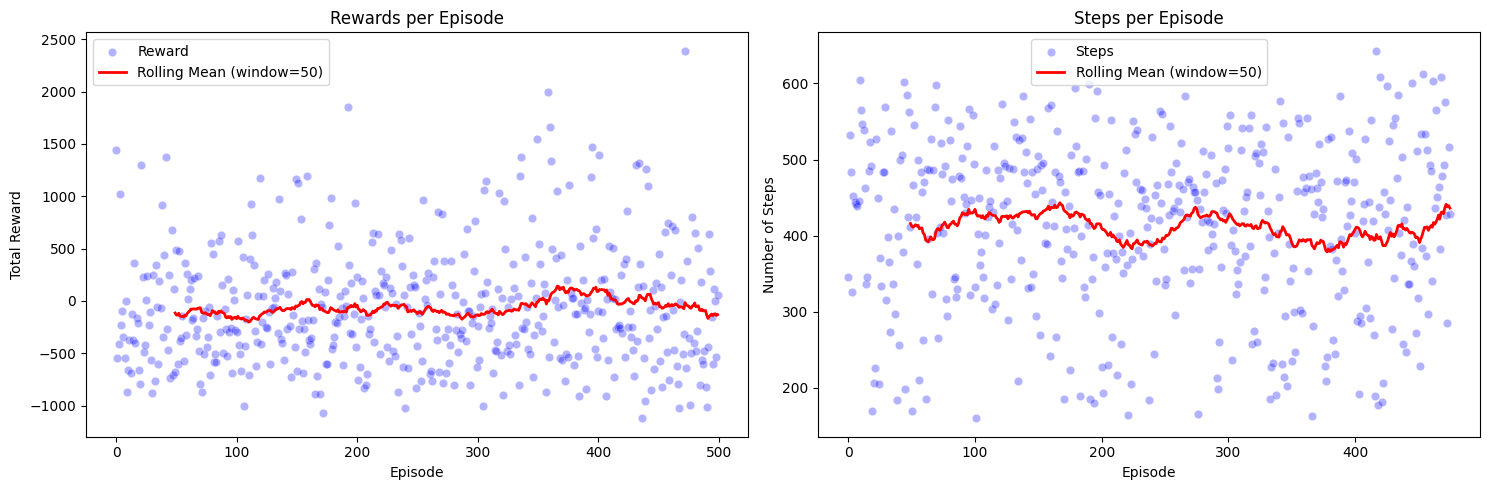

In [14]:
# Training and evaluation using different seeds
td_lambda.Env.set_seed(seed)
td_lambda.set_seed(seed)

# Evaluate the agent in inference mode
all_rewards, all_steps, all_reward_types, log_file = td_lambda.evaluate(num_episodes=500)

# Print the results
print(f"Average cumulative rewards for TD-Lambda Agent: {round(np.mean(all_rewards))}")
print(f"Average timesteps to termination for TD-Lambda Agent: {round(np.mean(all_steps))}")
print(f"Reward types: {all_reward_types}")

td_lambda.plot_metrics(all_rewards, all_steps, window_size=50)
plt.show()

### Monte-Carlo

#### Training

100%|██████████| 2000/2000 [02:36<00:00, 12.78it/s]


Early Termination Count: 81
Average total reward per episode = -3228.7326000000003
Average steps per episode = 505.9822824387702


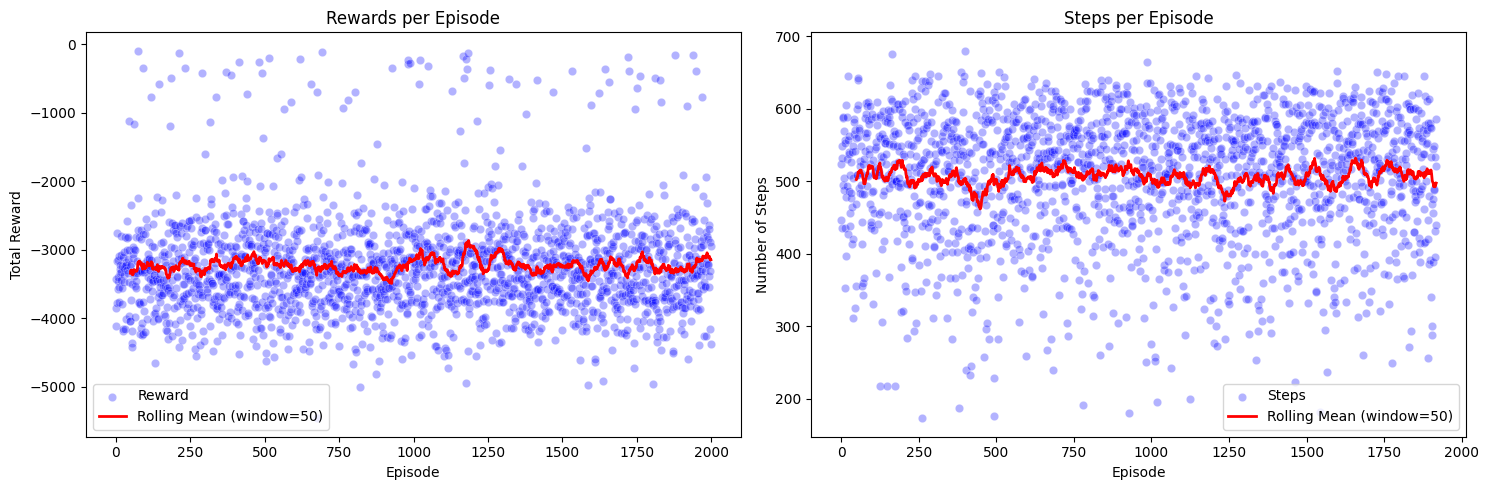

In [15]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)

mc = TemporalDifference(env, oiv = 0.1, alpha=5e-3, epsilon=1.0, lambd=1, gamma=0.55, epsilon_decay=0.9999, epsilon_min=0.06)
total_reward_list, total_steps_list = mc.train(num_episodes = 2000, on_policy = True)

print(f'Average total reward per episode = {np.mean(total_reward_list)}')
print(f'Average steps per episode = {np.mean(total_steps_list)}')

# plot training metrics
mc.plot_metrics(total_reward_list, total_steps_list, window_size=50)
plt.show()

In [16]:
q_learning.save_q_table("./logs/task2/task2_MC_q_table.json")

Q-table saved to ./logs/task2/task2_MC_q_table.json


Action Distribution:
Left:  1767 (35.6%)
Stay:  1746 (35.2%)
Right: 1448 (29.2%)


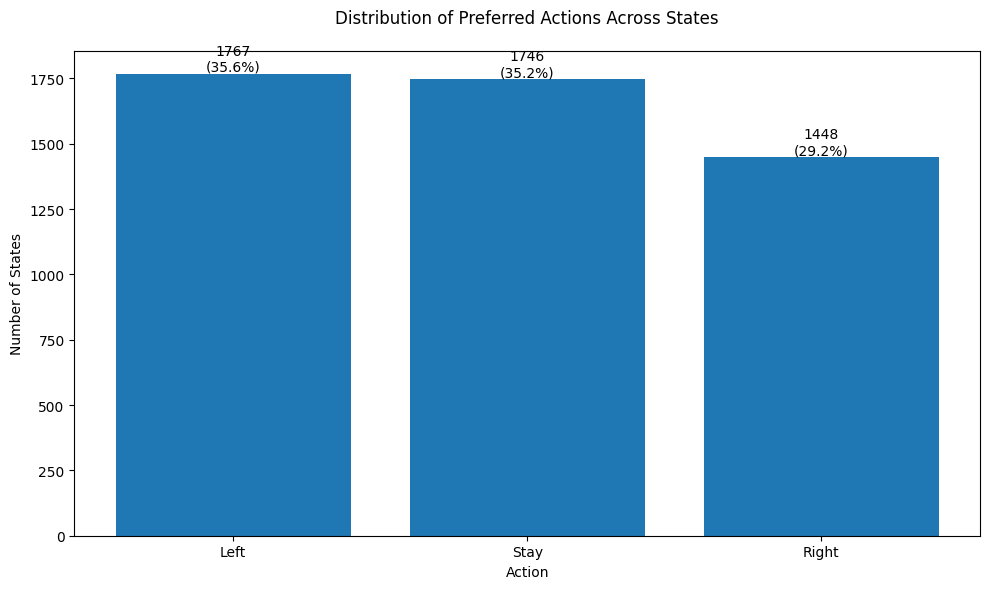

(1767, 1746, 1448, 35.61781898810724, 35.19451723442854, 29.187663777464223)

In [16]:
mc.analyze_model_actions()

#### Evaluation

In [18]:
q_learning.load_q_table("./logs/task2/task2_MC_q_table.json")

Q-table loaded from ./logs/task2/task2_MC_q_table.json


100%|██████████| 500/500 [00:36<00:00, 13.82it/s]


Early terminations: 20
Average cumulative rewards for Monte Carlo Agent: -289
Average timesteps to termination for Monte Carlo Agent: 424
Reward types: {'time_reward': -819.188, 'lane_change_reward': 106.905, 'clearance_rate_reward': 582.3048, 'risk_accident_reward': -159.324}


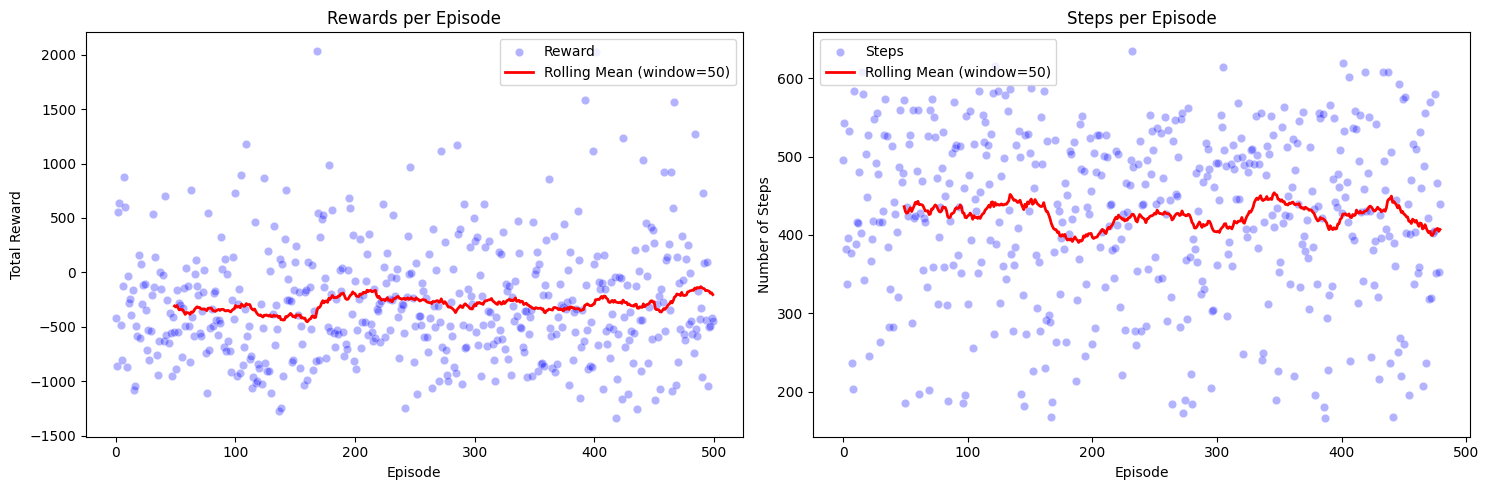

In [17]:
# Training and evaluation using different seeds
mc.Env.set_seed(seed)
mc.set_seed(seed)

# Evaluate the agent in inference mode
all_rewards, all_steps, all_reward_types, log_file = mc.evaluate(num_episodes=500)

# Print the results
print(f"Average cumulative rewards for Monte Carlo Agent: {round(np.mean(all_rewards))}")
print(f"Average timesteps to termination for Monte Carlo Agent: {round(np.mean(all_steps))}")
print(f"Reward types: {all_reward_types}")

mc.plot_metrics(all_rewards, all_steps, window_size=50)
plt.show()

### Visualization

In [42]:
json_path = log_file

extract_timesteps_from_json(json_path)
gif_filename = os.path.basename(json_path).replace('.json', '.gif')

gif_filepath = f'./gifs/task2/{gif_filename}'

create_visualization_from_cached_data(gif_filename=gif_filepath, step_interval=1)

Timesteps data from the first line successfully cached, containing 293 timesteps
GIF saved at ./gifs/task2/test_log_tdlambda_20241107_164214.gif


### Hyperparameter Tuning

In [ ]:
episodes = 1000
trials = 10
on_policy = False
hyperparameter_space = {
    'alpha': [1e-4, 1e-1],           # Learning rate range (log scale)
    'gamma': [0.1, 0.99],            # Discount factor range
    'epsilon_min': [0.01, 0.1],      # Minimum epsilon range
    # 'lambd': [0, 0.9]             # Lambda range for eligibility traces
}
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)
td_lambda = TemporalDifference(env)
# Run hyperparameter tuning
best_agent, best_params = td_lambda.hyperparameter_tuning(hyperparameter_space=hyperparameter_space, lambd=0, episodes=episodes, n_trials=trials, on_policy=on_policy)

## Policy-based Agent

### PPO

#### Training

In [4]:
# Set up log directory
log_dir = "../notebooks/logs/task2/ppo_baseline_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

In [ ]:
# Initialize and vectorize the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)
check_env(env, warn=True)
eval_env = Monitor(env)

hidden_size = 128
policy_kwargs = {
    "log_std_init": 0.0,
    "ortho_init": True,
    "activation_fn": nn.Tanh,
    "net_arch": {
        "pi": [hidden_size, hidden_size],
        "vf": [hidden_size, hidden_size],
    },
}

model = PPO(policy = "MlpPolicy",
            device = "cuda",
            env = env,
            verbose = 0,
            tensorboard_log = log_dir,
            seed=training_seed,
            learning_rate=1e-3,
            n_steps=1536,
            batch_size=128,
            n_epochs=4,
            gamma=0.99,
            gae_lambda=0.95,
            ent_coef=0.01,
            clip_range=0.2,
            policy_kwargs=policy_kwargs,
            max_grad_norm=100,
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 100000
model.learn(total_timesteps=total_timesteps, callback=eval_callback, progress_bar=True)

# Save the final model
final_model_path = log_dir + "final_model/final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Output()

Eval num_timesteps=1000, episode_reward=-17079.84 +/- 2176.94

Episode length: 540.20 +/- 73.03

New best mean reward!

Eval num_timesteps=2000, episode_reward=-748.38 +/- 490.53

Episode length: 473.60 +/- 129.59

New best mean reward!

Eval num_timesteps=3000, episode_reward=-1331.12 +/- 420.61

Episode length: 576.60 +/- 62.03

Eval num_timesteps=4000, episode_reward=-740.40 +/- 558.06

Episode length: 385.00 +/- 199.43

New best mean reward!

Eval num_timesteps=5000, episode_reward=-1190.98 +/- 375.86

Episode length: 603.40 +/- 47.52

Eval num_timesteps=6000, episode_reward=-1267.22 +/- 209.11

Episode length: 503.60 +/- 113.08

Eval num_timesteps=7000, episode_reward=-1344.76 +/- 473.62

Episode length: 523.20 +/- 40.03

Eval num_timesteps=8000, episode_reward=-918.56 +/- 523.58

Episode length: 540.40 +/- 117.60

Eval num_timesteps=9000, episode_reward=-1178.92 +/- 445.35

Episode length: 543.60 +/- 34.14

Eval num_timesteps=10000, episode_reward=-1442.70 +/- 330.27

Episode length: 512.40 +/- 87.01

Eval num_timesteps=11000, episode_reward=-1501.24 +/- 178.25

Episode length: 589.80 +/- 33.26

Eval num_timesteps=12000, episode_reward=-722.48 +/- 1104.53

Episode length: 400.80 +/- 127.80

New best mean reward!

Eval num_timesteps=13000, episode_reward=-1348.96 +/- 318.18

Episode length: 498.00 +/- 142.27

Eval num_timesteps=14000, episode_reward=-1419.30 +/- 1052.68

Episode length: 526.60 +/- 95.76

Eval num_timesteps=15000, episode_reward=-1784.42 +/- 831.74

Episode length: 529.40 +/- 87.74

Eval num_timesteps=16000, episode_reward=-1001.16 +/- 580.12

Episode length: 530.40 +/- 54.35

Eval num_timesteps=17000, episode_reward=-1042.04 +/- 447.67

Episode length: 528.20 +/- 37.90

Eval num_timesteps=18000, episode_reward=-646.76 +/- 910.19

Episode length: 428.80 +/- 129.64

New best mean reward!

Eval num_timesteps=19000, episode_reward=-1223.92 +/- 484.96

Episode length: 518.60 +/- 72.02

Eval num_timesteps=20000, episode_reward=-1113.94 +/- 879.98

Episode length: 468.60 +/- 74.56

Eval num_timesteps=21000, episode_reward=-846.28 +/- 954.91

Episode length: 469.00 +/- 142.59

Eval num_timesteps=22000, episode_reward=-868.46 +/- 384.12

Episode length: 484.20 +/- 78.30

Eval num_timesteps=23000, episode_reward=-710.50 +/- 664.22

Episode length: 452.00 +/- 117.48

Eval num_timesteps=24000, episode_reward=-1250.80 +/- 369.70

Episode length: 481.00 +/- 130.13

Eval num_timesteps=25000, episode_reward=-463.74 +/- 409.43

Episode length: 491.20 +/- 44.53

New best mean reward!

Eval num_timesteps=26000, episode_reward=-953.18 +/- 287.08

Episode length: 529.20 +/- 61.07

Eval num_timesteps=27000, episode_reward=-775.10 +/- 628.57

Episode length: 509.80 +/- 90.77

Eval num_timesteps=28000, episode_reward=-1114.52 +/- 256.00

Episode length: 558.80 +/- 33.89

Eval num_timesteps=29000, episode_reward=-1614.10 +/- 575.25

Episode length: 490.40 +/- 72.07

Eval num_timesteps=30000, episode_reward=-1246.22 +/- 600.66

Episode length: 525.60 +/- 79.68

Eval num_timesteps=31000, episode_reward=-1832.54 +/- 1080.20

Episode length: 523.20 +/- 123.07

Eval num_timesteps=32000, episode_reward=-1105.06 +/- 393.00

Episode length: 494.20 +/- 112.33

Eval num_timesteps=33000, episode_reward=-821.16 +/- 1234.52

Episode length: 456.40 +/- 69.32

Eval num_timesteps=34000, episode_reward=-1037.90 +/- 615.66

Episode length: 530.20 +/- 56.63

Eval num_timesteps=35000, episode_reward=-1011.16 +/- 589.41

Episode length: 473.00 +/- 100.25

Eval num_timesteps=36000, episode_reward=-850.56 +/- 711.33

Episode length: 503.40 +/- 100.78

Eval num_timesteps=37000, episode_reward=-1362.36 +/- 367.47

Episode length: 553.40 +/- 40.66

Eval num_timesteps=38000, episode_reward=-954.62 +/- 717.05

Episode length: 521.40 +/- 62.05

Eval num_timesteps=39000, episode_reward=-845.88 +/- 335.40

Episode length: 535.40 +/- 67.42

Eval num_timesteps=40000, episode_reward=-1237.14 +/- 860.07

Episode length: 526.40 +/- 101.20

Eval num_timesteps=41000, episode_reward=-839.64 +/- 428.28

Episode length: 477.40 +/- 42.86

Eval num_timesteps=42000, episode_reward=-1232.76 +/- 661.06

Episode length: 546.80 +/- 112.70

Eval num_timesteps=43000, episode_reward=-1450.58 +/- 199.76

Episode length: 571.80 +/- 50.58

Eval num_timesteps=44000, episode_reward=-1536.42 +/- 697.88

Episode length: 552.60 +/- 27.80

Eval num_timesteps=45000, episode_reward=-948.16 +/- 510.74

Episode length: 464.40 +/- 127.37

Eval num_timesteps=46000, episode_reward=-1340.20 +/- 997.95

Episode length: 505.60 +/- 84.47

Eval num_timesteps=47000, episode_reward=-1137.62 +/- 284.63

Episode length: 527.80 +/- 48.14

Eval num_timesteps=48000, episode_reward=-1229.56 +/- 262.62

Episode length: 499.00 +/- 51.51

Eval num_timesteps=49000, episode_reward=-1249.12 +/- 161.50

Episode length: 528.00 +/- 43.41

Eval num_timesteps=50000, episode_reward=-1447.70 +/- 349.93

Episode length: 558.20 +/- 58.85

Eval num_timesteps=51000, episode_reward=-1275.26 +/- 674.99

Episode length: 498.20 +/- 103.23

Eval num_timesteps=52000, episode_reward=-1000.98 +/- 351.06

Episode length: 521.20 +/- 78.99

Eval num_timesteps=53000, episode_reward=-1176.64 +/- 778.89

Episode length: 492.40 +/- 95.00

Eval num_timesteps=54000, episode_reward=-1217.82 +/- 261.85

Episode length: 554.60 +/- 70.11

Eval num_timesteps=55000, episode_reward=-1082.88 +/- 192.84

Episode length: 561.80 +/- 71.15

Eval num_timesteps=56000, episode_reward=-1186.30 +/- 562.39

Episode length: 551.40 +/- 50.45

Eval num_timesteps=57000, episode_reward=-1438.60 +/- 353.55

Episode length: 517.20 +/- 91.76

Eval num_timesteps=58000, episode_reward=-1271.76 +/- 768.81

Episode length: 447.80 +/- 196.89

Eval num_timesteps=59000, episode_reward=-1352.02 +/- 767.17

Episode length: 486.40 +/- 47.05

Eval num_timesteps=60000, episode_reward=-1063.44 +/- 284.51

Episode length: 493.60 +/- 81.50

Eval num_timesteps=61000, episode_reward=-1009.90 +/- 360.95

Episode length: 551.20 +/- 88.41

Eval num_timesteps=62000, episode_reward=-1171.02 +/- 397.09

Episode length: 539.00 +/- 42.21

Eval num_timesteps=63000, episode_reward=-1199.90 +/- 494.75

Episode length: 554.60 +/- 49.83

Eval num_timesteps=64000, episode_reward=-1064.54 +/- 408.04

Episode length: 465.60 +/- 124.64

Eval num_timesteps=65000, episode_reward=-1769.60 +/- 343.16

Episode length: 527.60 +/- 109.05

Eval num_timesteps=66000, episode_reward=-1109.90 +/- 351.42

Episode length: 523.00 +/- 59.80

Eval num_timesteps=67000, episode_reward=-679.60 +/- 451.76

Episode length: 446.40 +/- 177.39

Eval num_timesteps=68000, episode_reward=-1006.80 +/- 424.37

Episode length: 493.80 +/- 94.76

Eval num_timesteps=69000, episode_reward=-894.92 +/- 336.27

Episode length: 500.80 +/- 117.20

Eval num_timesteps=70000, episode_reward=-1405.02 +/- 718.75

Episode length: 448.80 +/- 141.75

Eval num_timesteps=71000, episode_reward=-740.32 +/- 862.84

Episode length: 466.80 +/- 86.97

Eval num_timesteps=72000, episode_reward=-1108.54 +/- 1008.74

Episode length: 423.40 +/- 222.72

Eval num_timesteps=73000, episode_reward=-970.10 +/- 350.68

Episode length: 491.40 +/- 65.59

Eval num_timesteps=74000, episode_reward=-1171.12 +/- 255.58

Episode length: 558.20 +/- 15.48

Eval num_timesteps=75000, episode_reward=-1199.98 +/- 193.41

Episode length: 560.60 +/- 37.98

Eval num_timesteps=76000, episode_reward=-808.80 +/- 770.46

Episode length: 438.60 +/- 105.01

Eval num_timesteps=77000, episode_reward=-877.76 +/- 1086.58

Episode length: 500.40 +/- 96.18

Eval num_timesteps=78000, episode_reward=-1210.42 +/- 65.19

Episode length: 555.40 +/- 67.27

Eval num_timesteps=79000, episode_reward=-817.26 +/- 637.08

Episode length: 517.60 +/- 116.81

Eval num_timesteps=80000, episode_reward=-964.28 +/- 176.82

Episode length: 454.60 +/- 124.64

Eval num_timesteps=81000, episode_reward=-483.30 +/- 857.46

Episode length: 370.60 +/- 200.98

Eval num_timesteps=82000, episode_reward=-348.82 +/- 598.14

Episode length: 424.20 +/- 85.43

New best mean reward!

Eval num_timesteps=83000, episode_reward=-878.96 +/- 750.93

Episode length: 444.40 +/- 122.96

Eval num_timesteps=84000, episode_reward=-1420.12 +/- 387.44

Episode length: 517.40 +/- 102.31

Eval num_timesteps=85000, episode_reward=-335.88 +/- 998.70

Episode length: 422.20 +/- 124.24

New best mean reward!

Eval num_timesteps=86000, episode_reward=-473.40 +/- 445.99

Episode length: 457.00 +/- 101.06

Eval num_timesteps=87000, episode_reward=-818.18 +/- 839.21

Episode length: 468.00 +/- 99.10

Eval num_timesteps=88000, episode_reward=-1114.64 +/- 375.17

Episode length: 556.40 +/- 34.03

Eval num_timesteps=89000, episode_reward=-908.62 +/- 316.03

Episode length: 507.00 +/- 39.13

Eval num_timesteps=90000, episode_reward=-1502.42 +/- 312.88

Episode length: 563.20 +/- 46.11

Eval num_timesteps=91000, episode_reward=-1536.08 +/- 181.02

Episode length: 498.80 +/- 57.17

Eval num_timesteps=92000, episode_reward=-522.36 +/- 574.68

Episode length: 428.80 +/- 205.32

Eval num_timesteps=93000, episode_reward=-836.84 +/- 440.09

Episode length: 495.60 +/- 52.49

Eval num_timesteps=94000, episode_reward=-1243.18 +/- 432.72

Episode length: 553.00 +/- 75.88

Eval num_timesteps=95000, episode_reward=-1358.48 +/- 314.20

Episode length: 568.00 +/- 51.58

Eval num_timesteps=96000, episode_reward=-1406.50 +/- 514.61

Episode length: 558.20 +/- 36.78

Eval num_timesteps=97000, episode_reward=-1325.26 +/- 306.37

Episode length: 574.00 +/- 31.70

Eval num_timesteps=98000, episode_reward=-798.36 +/- 691.24

Episode length: 504.20 +/- 104.72

Eval num_timesteps=99000, episode_reward=-1166.66 +/- 146.94

Episode length: 522.00 +/- 37.35

Eval num_timesteps=100000, episode_reward=-1005.50 +/- 402.68

Episode length: 488.80 +/- 58.17

Eval num_timesteps=101000, episode_reward=-1095.40 +/- 439.45

Episode length: 566.00 +/- 79.78

Final model saved to ./notebooks/logs/task2/ppo_baseline_model/final_model


#### Evaluation

c:\Users\danie\OneDrive - Singapore Management University\SMU Singapore\Academics\Aug 2024\CS609_ReinforcementLearning\Project\LaneSwitchRL-Simulation\.venv\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
c:\Users\danie\OneDrive - Singapore Management University\SMU Singapore\Academics\Aug 2024\CS609_ReinforcementLearning\Project\LaneSwitchRL-Simulation\.venv\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
100%|██████████| 500/500 [02:11<00:00,  3.79it/s]


Average reward of 500 episodes is -1121.
Average timesteps of 500 episodes is 512.
Early terminations: 2
Reward types: {'time_reward': -1024.516, 'lane_change_reward': -0.5753999999999999, 'clearance_rate_reward': -34.030399999999965, 'risk_accident_reward': -62.284}


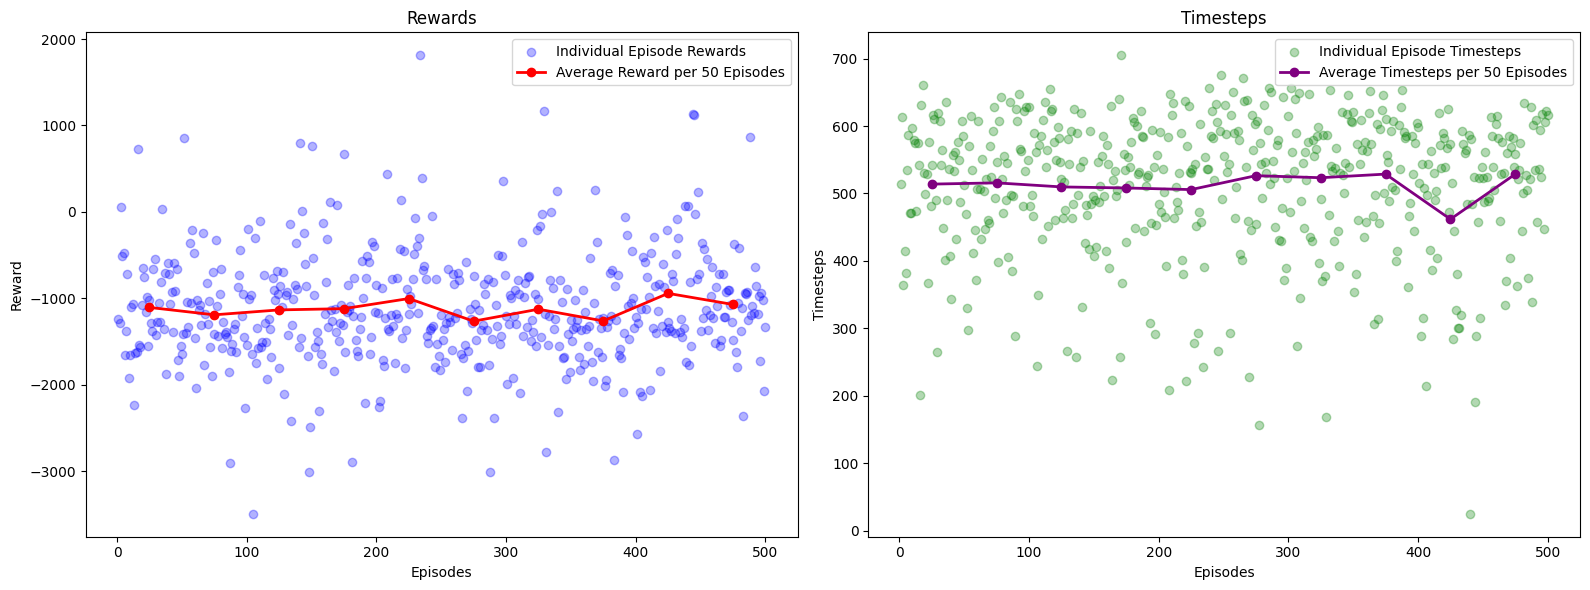

In [ ]:
# Load the best baseline model
model_path = log_dir + 'best_model/best_model.zip'
# model_path = log_dir + 'final_model.zip'
model = PPO.load(model_path)

# Create test environment
eval_env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=seed)
check_env(eval_env)
ppo_agent = PolicyAgents(eval_env, model)

# Test the model
num_episodes = 500
file_name = 'ppo_baseline_best_model_test_log.json'
rewards, timesteps, all_reward_types, action_distribution = ppo_agent.evaluate(num_episodes=num_episodes, output_file=file_name)

print(f"Reward types: {all_reward_types}")

# Plot the metrics
ppo_agent.plot_test_results(rewards=rewards, timesteps=timesteps, interval=50)

Action Distribution:
Left:     0 (0.0%)
Stay:   511 (100.0%)
Right:    0 (0.0%)


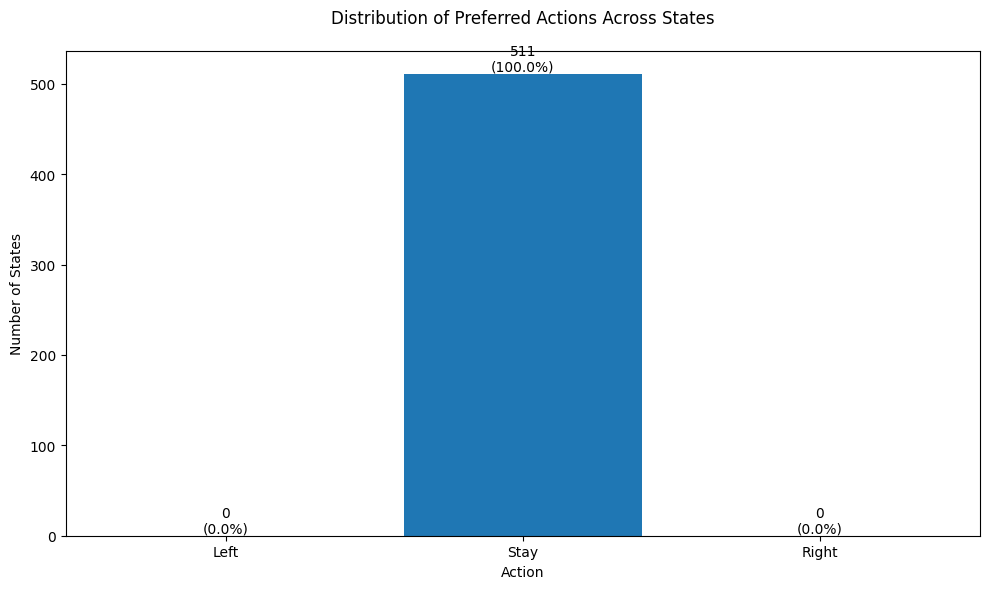

(0, 511, 0, 0.0, 100.0, 0.0)

In [6]:
ppo_agent.analyze_model_actions(action_distribution)

## Reward Shaping

We show how reward shaping can change the behaviour of the agent. In the default configuration we seek to compete with the Fast Lane Agent by maintaining a balance between safety and speed. Now we try to compete with the Same Lane Agent in terms of safety.

### Prioritize Safety

100%|██████████| 2000/2000 [03:24<00:00,  9.80it/s]


Early Termination Count: 22
Average total reward per episode = -388.0336499999999
Average steps per episode = 499.83822042467136


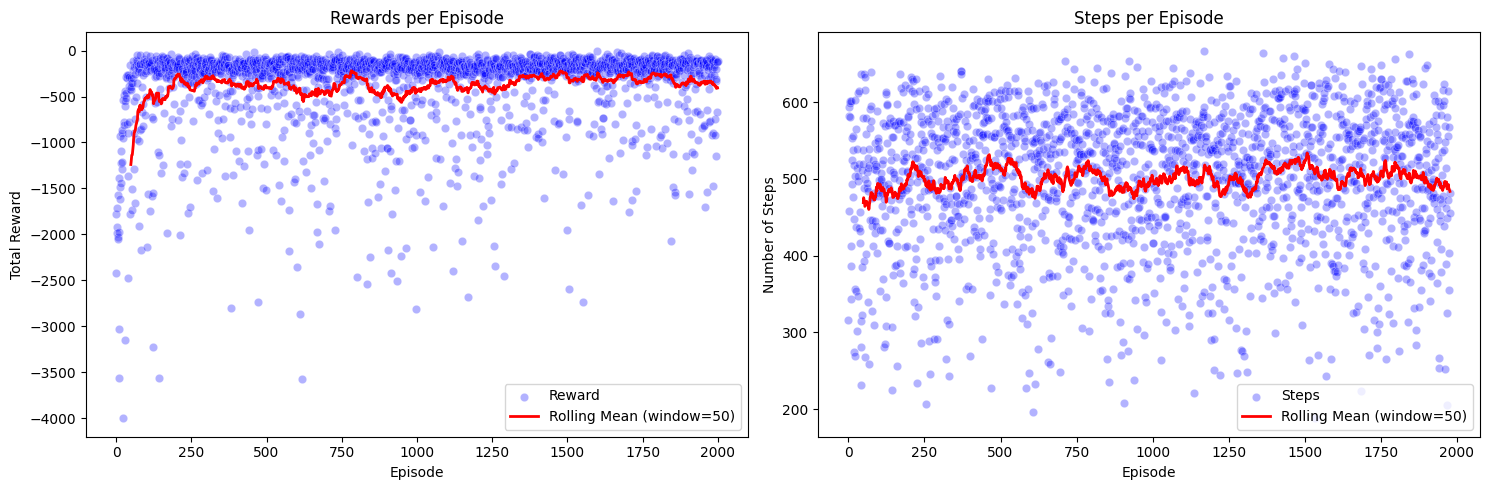

In [19]:
# Create the environment
config_path = '../src/task2/config/safety.json'
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed, config=config_path)

q_learning_safety = TemporalDifference(env, oiv = 0.1, alpha=5e-3, epsilon=1.0, lambd=0, gamma=0.55, epsilon_decay=0.9999, epsilon_min=0.06)
total_reward_list, total_steps_list = q_learning_safety.train(num_episodes = 2000, on_policy = False)

print(f'Average total reward per episode = {np.mean(total_reward_list)}')
print(f'Average steps per episode = {np.mean(total_steps_list)}')

# plot training metrics
q_learning_safety.plot_metrics(total_reward_list, total_steps_list, window_size=50)
plt.show()

In [20]:
q_learning.save_q_table("./logs/task2/task2_QLearning_safety_q_table.json")

Q-table saved to ./logs/task2/task2_QLearning_safety_q_table.json


Action Distribution:
Left:  1141 (23.9%)
Stay:  2527 (53.0%)
Right: 1104 (23.1%)


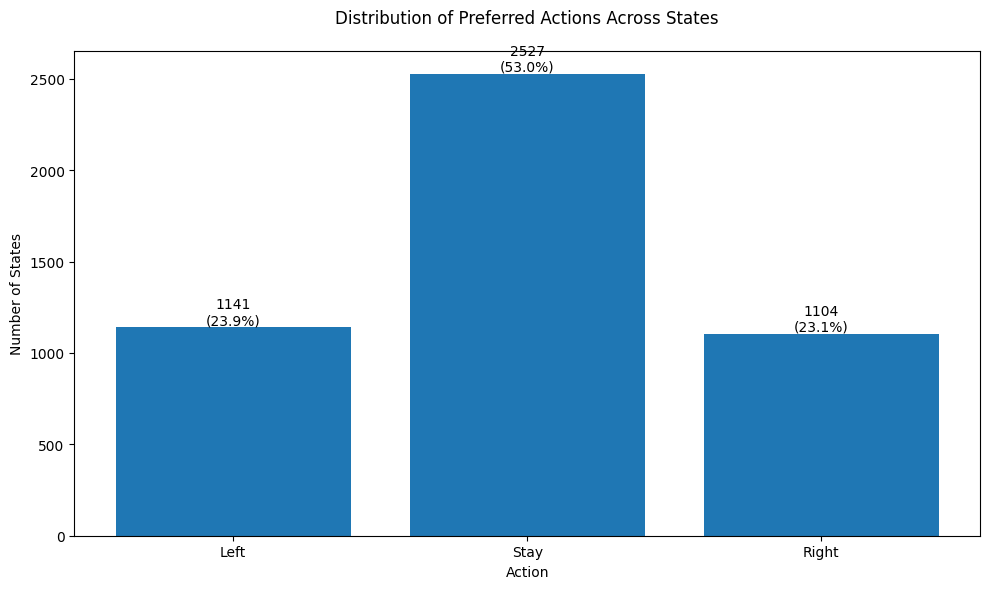

(1141, 2527, 1104, 23.910310142497902, 52.9547359597653, 23.1349538977368)

In [7]:
q_learning_safety.analyze_model_actions()

In [21]:
q_learning.load_q_table("./logs/task2/task2_QLearning_safety_q_table.json")

Q-table loaded from ./logs/task2/task2_QLearning_safety_q_table.json


100%|██████████| 500/500 [00:45<00:00, 10.90it/s]


Early terminations: 1
Average cumulative rewards for TD-Lambda Agent: -174
Average timesteps to termination for TD-Lambda Agent: 502
Reward types: {'time_reward': 0.0, 'lane_change_reward': -33.646, 'clearance_rate_reward': -7.889400000000014, 'risk_accident_reward': -132.642}


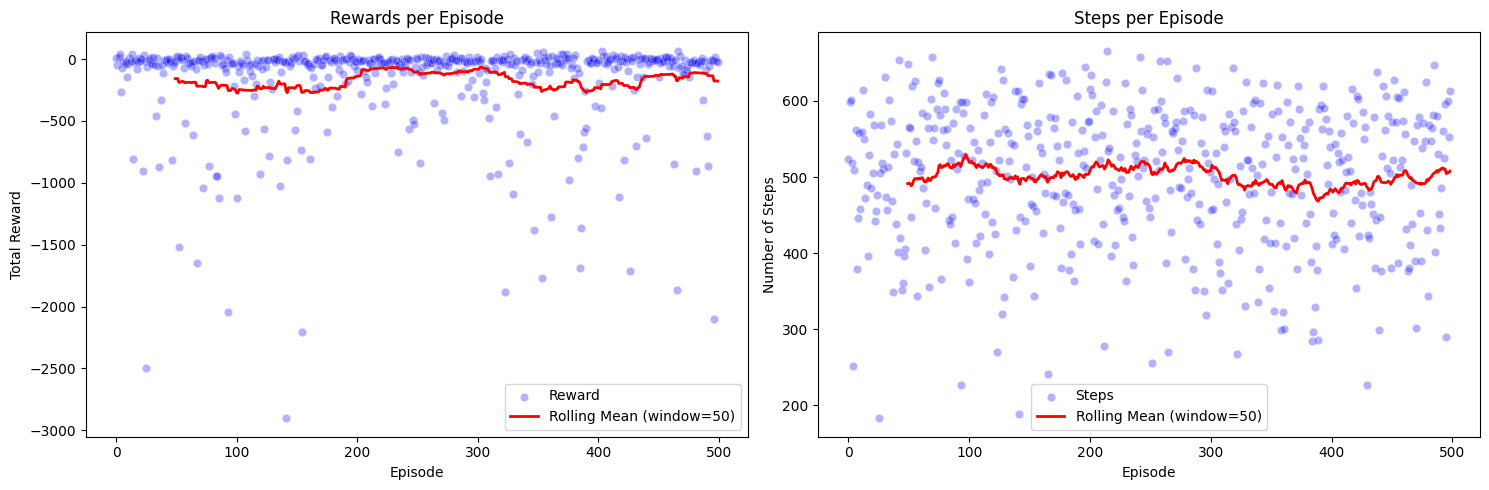

In [22]:
# Training and evaluation using different seeds
q_learning_safety.Env.set_seed(seed)
q_learning_safety.set_seed(seed)

# Evaluate the agent in inference mode
all_rewards, all_steps, all_reward_types, log_file = q_learning_safety.evaluate(num_episodes=500)

# Print the results
print(f"Average cumulative rewards for TD-Lambda Agent: {round(np.mean(all_rewards))}")
print(f"Average timesteps to termination for TD-Lambda Agent: {round(np.mean(all_steps))}")
print(f"Reward types: {all_reward_types}")

q_learning_safety.plot_metrics(all_rewards, all_steps, window_size=50)
plt.show()